In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df2011 = pd.read_csv('S2011_2012.csv')
df2012 = pd.read_csv('S2012_2013.csv')
df2013 = pd.read_csv('S2013_2014.csv')
df2014 = pd.read_csv('S2014_2015.csv')
df2015 = pd.read_csv('S2015_2016.csv')
df2016 = pd.read_csv('S2016_2017.csv')
df2017 = pd.read_csv('S2017_2018.csv')
df2018 = pd.read_csv('S2018_2019.csv')

### Creation variable saison

In [3]:
df2011['Saison'] = '2011-2012'
df2012['Saison'] = '2012-2013'
df2013['Saison'] = '2013-2014'
df2014['Saison'] = '2014-2015'
df2015['Saison'] = '2015-2016'
df2016['Saison'] = '2016-2017'
df2017['Saison'] = '2017-2018'
df2018['Saison'] = '2018-2019'


###  Gerer variable temporelle 

In [4]:
df2011['Date'] = pd.to_datetime(df2011['Date'],dayfirst=True)
df2011['Avancement_saison'] = (df2011['Date'] - df2011['Date'].min()) / ( df2011['Date'].max() - df2011['Date'].min())

df2012['Date'] = pd.to_datetime(df2012['Date'],dayfirst=True)
df2012['Avancement_saison'] = (df2012['Date'] - df2012['Date'].min()) / ( df2012['Date'].max() - df2012['Date'].min())

df2013['Date'] = pd.to_datetime(df2013['Date'],dayfirst=True)
df2013['Avancement_saison'] = (df2013['Date'] - df2013['Date'].min()) / ( df2013['Date'].max() - df2013['Date'].min())

df2014['Date'] = pd.to_datetime(df2014['Date'],dayfirst=True)
df2014['Avancement_saison'] = (df2014['Date'] - df2014['Date'].min()) / ( df2014['Date'].max() - df2014['Date'].min())

df2015['Date'] = pd.to_datetime(df2015['Date'],dayfirst=True)
df2015['Avancement_saison'] = (df2015['Date'] - df2015['Date'].min()) / ( df2015['Date'].max() - df2015['Date'].min())

df2016['Date'] = pd.to_datetime(df2016['Date'],dayfirst=True)
df2016['Avancement_saison'] = (df2016['Date'] - df2016['Date'].min()) / ( df2016['Date'].max() - df2016['Date'].min())

df2017['Date'] = pd.to_datetime(df2017['Date'],dayfirst=True)
df2017['Avancement_saison'] = (df2017['Date'] - df2017['Date'].min()) / ( df2017['Date'].max() - df2017['Date'].min())

df2018['Date'] = pd.to_datetime(df2018['Date'],dayfirst=True)
df2018['Avancement_saison'] = (df2018['Date'] - df2018['Date'].min()) / ( df2018['Date'].max() - df2018['Date'].min())

In [5]:
#Concatenation de toutes les saisons 
df = pd.concat([
    df2011,df2012,df2013,df2014,df2015,df2016,df2017,df2018
],ignore_index=True)

In [6]:
## Calcul de la moyenne des Odds Home
df['HO'] = df[['B365H', 'BSH', 'BWH', 'GBH', 'IWH', 'LBH', 'PSH', 'SBH', 'SJH', 'VCH', 'WHH']].mean(axis=1)
## Calcul de la moyenne des Odds DRAW
df['DO'] = df[['B365D', 'BSD', 'BWD', 'GBD', 'IWD', 'LBD', 'PSD', 'SBD', 'SJD', 'VCD', 'WHD']].mean(axis=1)
## Calcul de la moyenne des Odds Away
df['AO'] = df[['B365A', 'BSA', 'BWA', 'GBA', 'IWA', 'LBA', 'PSA', 'SBA', 'SJA', 'VCA', 'WHA']].mean(axis=1)

In [7]:
df.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,Avancement_saison,PSH,PSD,PSA,PSCH,PSCD,PSCA,HO,DO,AO
0,F1,2011-08-06,Ajaccio,Toulouse,0,2,A,0.0,1.0,A,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2.589,3.005,2.789
1,F1,2011-08-06,Brest,Evian Thonon Gaillard,2,2,D,2.0,2.0,D,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2.225,3.060,3.330
2,F1,2011-08-06,Caen,Valenciennes,1,0,H,1.0,0.0,H,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2.233,3.060,3.320
3,F1,2011-08-06,Marseille,Sochaux,2,2,D,1.0,0.0,H,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.525,3.810,6.300
4,F1,2011-08-06,Montpellier,Auxerre,3,1,H,1.0,1.0,D,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2.155,3.070,3.480


# Importance des variables

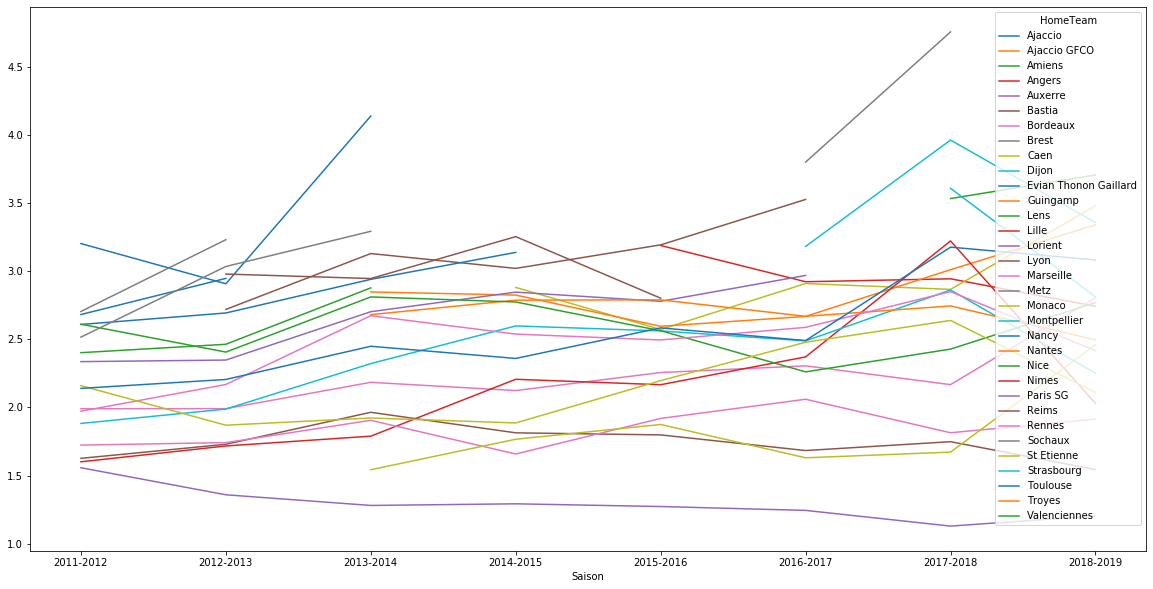

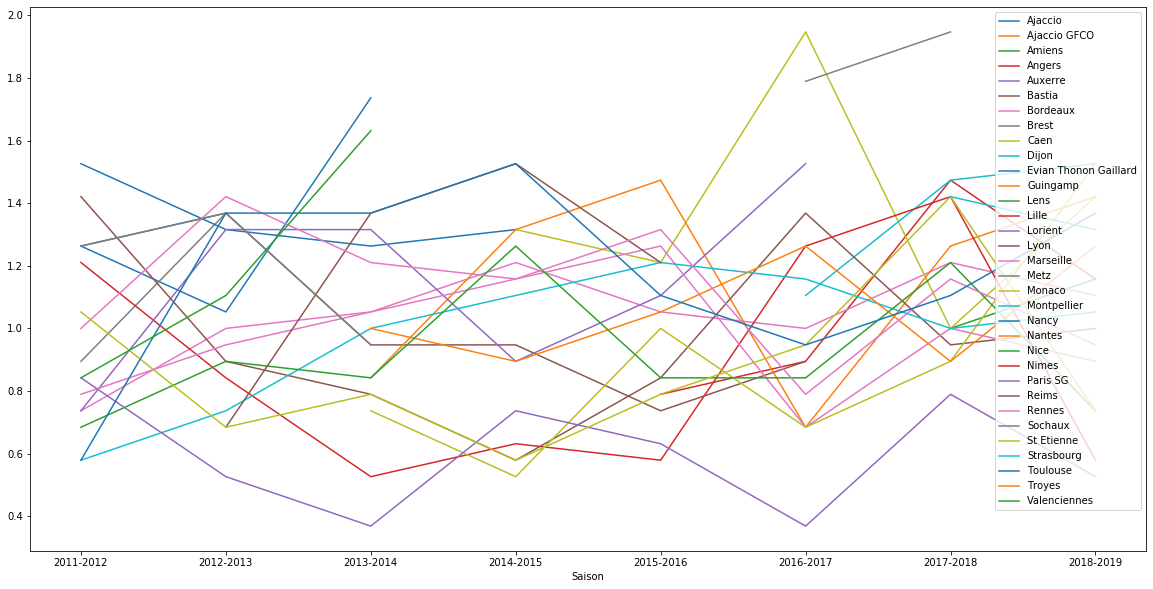

In [7]:
fig, ax = plt.subplots(figsize=(20,10))
df.groupby(['Saison','HomeTeam']).mean()['HO'].unstack().plot(ax=ax)

fig, ax = plt.subplots(figsize=(20,10))
df.groupby(['Saison','HomeTeam']).mean()['FTAG'].unstack().plot(ax=ax)
plt.legend()

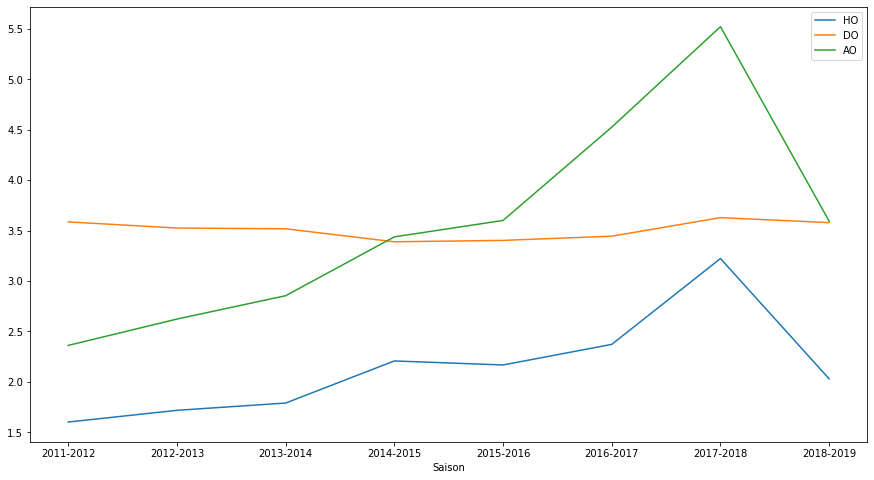

In [627]:
fig, ax = plt.subplots(figsize=(15,8))
df[df['HomeTeam'] == 'Lille'].groupby(['Saison']).mean()['HO'].plot(ax=ax)
df[(df['HomeTeam'] == 'Lille') | (df['AwayTeam'] == 'Montpellier')].groupby(['Saison']).mean()['DO'].plot(ax=ax)
df[df['AwayTeam'] == 'Lille'].groupby(['Saison']).mean()['AO'].plot(ax=ax)
plt.legend()

In [8]:
df[(df['HomeTeam'] == 'Montpellier') | (df['AwayTeam'] == 'Montpellier')]

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,Avancement_saison,PSH,PSD,PSA,PSCH,PSCD,PSCA,HO,DO,AO
4,F1,2011-08-06,Montpellier,Auxerre,3,1,H,1.0,1.0,D,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.155000,3.070000,3.480000
19,F1,2011-08-14,Lille,Montpellier,0,1,A,0.0,0.0,D,...,0.027778,NaN,NaN,NaN,NaN,NaN,NaN,1.593000,3.605000,5.815000
27,F1,2011-08-21,Montpellier,Rennes,4,0,H,1.0,0.0,H,...,0.052083,NaN,NaN,NaN,NaN,NaN,NaN,2.435000,3.080000,2.919000
33,F1,2011-08-27,Lyon,Montpellier,2,1,H,0.0,0.0,D,...,0.072917,NaN,NaN,NaN,NaN,NaN,NaN,1.542000,3.710000,6.275000
47,F1,2011-09-11,Montpellier,Nice,1,0,H,0.0,0.0,D,...,0.125000,NaN,NaN,NaN,NaN,NaN,NaN,1.703000,3.440000,5.125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2998,F1,2019-04-30,Montpellier,Paris SG,3,2,H,1.0,1.0,D,...,0.916376,3.93,3.91,1.93,4.89,4.09,1.72,3.951667,3.776667,1.891667
3007,F1,2019-05-05,Montpellier,Amiens,1,1,D,0.0,0.0,D,...,0.933798,1.75,3.78,5.16,1.79,3.50,5.38,1.733333,3.655000,5.135000
3010,F1,2019-05-10,St Etienne,Montpellier,0,1,A,0.0,0.0,D,...,0.951220,1.75,3.85,5.04,1.80,3.79,4.82,1.735000,3.850000,4.781667
3025,F1,2019-05-18,Montpellier,Nantes,1,1,D,0.0,1.0,A,...,0.979094,1.87,3.88,4.27,1.90,3.67,4.38,1.826667,3.780000,4.266667


# Importance des variables

### Concaténation Données budget et Affluence

In [9]:
Budgets = pd.read_excel('budgets.xlsx')
Budgets

,HomeTeam,Budget,Saison
0,Ajaccio,16.0,2011-2012
1,Brest,27.0,2011-2012
2,Caen,32.0,2011-2012
3,Marseille,140.0,2011-2012
4,Montpellier,33.0,2011-2012
...,...,...,...
155,Monaco,215.0,2018-2019
156,Rennes,68.0,2018-2019
157,Nimes,20.0,2018-2019
158,Strasbourg,37.5,2018-2019


In [10]:
Affluence = pd.read_excel('Affluence.xlsx')

In [11]:
df = df.merge(Budgets, how='left', left_on=['HomeTeam','Saison'],right_on=['HomeTeam','Saison'],suffixes=('_Hometeam', '_Hometeam'))
df = df.merge(Budgets, how='left', left_on=['AwayTeam','Saison'],right_on=['HomeTeam','Saison'],suffixes=('', '_Awayteam'))

In [12]:
# Raport budget entre équipe à domicile et à l'exterieur
df['Budget_rapport'] = df['Budget']/df['Budget_Awayteam']

In [13]:
df = df.merge(Affluence, how='left', left_on=['HomeTeam','Saison'],right_on=['HomeTeam','Saison'])

### Base cleaning

In [14]:
#Infos des données manquantes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3040 entries, 0 to 3039
Data columns (total 86 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Div                3040 non-null   object        
 1   Date               3040 non-null   datetime64[ns]
 2   HomeTeam           3040 non-null   object        
 3   AwayTeam           3040 non-null   object        
 4   FTHG               3040 non-null   int64         
 5   FTAG               3040 non-null   int64         
 6   FTR                3040 non-null   object        
 7   HTHG               3039 non-null   float64       
 8   HTAG               3039 non-null   float64       
 9   HTR                3039 non-null   object        
 10  HS                 3039 non-null   float64       
 11  AS                 3039 non-null   float64       
 12  HST                3039 non-null   float64       
 13  AST                3039 non-null   float64       
 14  HF      

In [15]:
## Bastia - Lyon du 16/04/17 Données manquantes car match arrété suite à incidents.
df.loc[2225]
#Decision: Supprimer cette ligne
df = df.drop(df.index[2225])

In [16]:
## AF = Away Team Fouls Committed
df['AF'][df['AF'].isnull()] = df['AF'].mean()
df['AF']=df['AF'].round(0)
## AC = Away Team Corners
df['AC'][df['AC'].isnull()] = df['AC'].mean()
df['AC']=df['AC'].round(0)
## AR = Away Team Red Cards
df['AR'][df['AR'].isnull()] = df['AR'].mean()
df['AR']=df['AR'].round(0)
## AS = Away Team Shots
df['AS'][df['AS'].isnull()] = df['AS'].mean()
df['AS']=df['AS'].round(0)

## AST = Away Team Shots on Target
df['AST'][df['AST'].isnull()] = df['AST'].mean()
df['AST']=df['AST'].round(0)
## AY = Away Team Yellow Cards
df['AY'][df['AY'].isnull()] = df['AY'].mean()
df['AY']=df['AY'].round(0)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning

In [17]:
df[df['B365A'].isnull()] 
df.loc[1864]

Div                                   F1
Date                 2016-04-24 00:00:00
HomeTeam                       Marseille
AwayTeam                          Nantes
FTHG                                   1
                            ...         
Budget                               125
HomeTeam_Awayteam                 Nantes
Budget_Awayteam                       38
Budget_rapport                   3.28947
Affluence                          42015
Name: 1864, Length: 86, dtype: object

### Enrichir base

In [18]:
# créer variable classement
df['Home_point'] = df['FTR'].apply(lambda x: 3 if x == 'H' else (1 if x == 'D' else 0))
df['Away_point'] = df['FTR'].apply(lambda x: 3 if x == 'A' else (1 if x == 'D' else 0))

In [19]:
#Cumuler la variable classement
df['Classt_Home'] = df.groupby(['Saison','HomeTeam'])['Home_point'].transform(pd.Series.cumsum)
df['Classt_Away'] = df.groupby(['Saison','AwayTeam'])['Away_point'].transform(pd.Series.cumsum)


In [20]:
#cumuler toutes les autres variables
df['Cumul_HC'] = df.groupby(['Saison','HomeTeam'])['HC'].transform(pd.Series.cumsum)
df['Cumul_AC'] = df.groupby(['Saison','AwayTeam'])['AC'].transform(pd.Series.cumsum)

df['Cumul_HF'] = df.groupby(['Saison','HomeTeam'])['HF'].transform(pd.Series.cumsum)
df['Cumul_AF'] = df.groupby(['Saison','AwayTeam'])['AF'].transform(pd.Series.cumsum)

df['Cumul_HR'] = df.groupby(['Saison','HomeTeam'])['HR'].transform(pd.Series.cumsum)
df['Cumul_AR'] = df.groupby(['Saison','AwayTeam'])['AR'].transform(pd.Series.cumsum)

df['Cumul_HS'] = df.groupby(['Saison','HomeTeam'])['HS'].transform(pd.Series.cumsum)
df['Cumul_AS'] = df.groupby(['Saison','AwayTeam'])['AS'].transform(pd.Series.cumsum)

df['Cumul_HST'] = df.groupby(['Saison','HomeTeam'])['HST'].transform(pd.Series.cumsum)
df['Cumul_AST'] = df.groupby(['Saison','AwayTeam'])['AST'].transform(pd.Series.cumsum)

df['Cumul_HY'] = df.groupby(['Saison','HomeTeam'])['HY'].transform(pd.Series.cumsum)
df['Cumul_AY'] = df.groupby(['Saison','AwayTeam'])['AY'].transform(pd.Series.cumsum)

df['Cumul_FTHG'] = df.groupby(['Saison','HomeTeam'])['FTHG'].transform(pd.Series.cumsum)
df['Cumul_FTAG'] = df.groupby(['Saison','AwayTeam'])['FTAG'].transform(pd.Series.cumsum)

df['Cumul_HTHG'] = df.groupby(['Saison','HomeTeam'])['HTHG'].transform(pd.Series.cumsum)
df['Cumul_HTAG'] = df.groupby(['Saison','AwayTeam'])['HTAG'].transform(pd.Series.cumsum)


In [21]:
#Lag1 des variables cumulées
#Home
df['Cumul_HC'] = df.groupby(['Saison','HomeTeam'])['Cumul_HC'].shift(periods=1).fillna(0)
df['Cumul_HF'] = df.groupby(['Saison','HomeTeam'])['Cumul_HF'].shift(periods=1).fillna(0)
df['Cumul_HR'] = df.groupby(['Saison','HomeTeam'])['Cumul_HR'].shift(periods=1).fillna(0)
df['Cumul_HS'] = df.groupby(['Saison','HomeTeam'])['Cumul_HS'].shift(periods=1).fillna(0)
df['Cumul_HST'] = df.groupby(['Saison','HomeTeam'])['Cumul_HST'].shift(periods=1).fillna(0)
df['Cumul_HY'] = df.groupby(['Saison','HomeTeam'])['Cumul_HY'].shift(periods=1).fillna(0)
df['Cumul_FTHG'] = df.groupby(['Saison','HomeTeam'])['Cumul_FTHG'].shift(periods=1).fillna(0)
df['Cumul_HTHG'] = df.groupby(['Saison','HomeTeam'])['Cumul_HTHG'].shift(periods=1).fillna(0)
df['Classt_Home'] = df.groupby(['Saison','HomeTeam'])['Classt_Home'].shift(periods=1).fillna(0)

#Away
df['Cumul_AC'] = df.groupby(['Saison','AwayTeam'])['Cumul_AC'].shift(periods=1).fillna(0)
df['Cumul_AF'] = df.groupby(['Saison','AwayTeam'])['Cumul_AF'].shift(periods=1).fillna(0)
df['Cumul_AR'] = df.groupby(['Saison','AwayTeam'])['Cumul_AR'].shift(periods=1).fillna(0)
df['Cumul_AS'] = df.groupby(['Saison','AwayTeam'])['Cumul_AS'].shift(periods=1).fillna(0)
df['Cumul_AST'] = df.groupby(['Saison','AwayTeam'])['Cumul_AST'].shift(periods=1).fillna(0)
df['Cumul_AY'] = df.groupby(['Saison','AwayTeam'])['Cumul_AY'].shift(periods=1).fillna(0)
df['Cumul_FTAG'] = df.groupby(['Saison','AwayTeam'])['Cumul_FTAG'].shift(periods=1).fillna(0)
df['Cumul_HTAG'] = df.groupby(['Saison','AwayTeam'])['Cumul_HTAG'].shift(periods=1).fillna(0)
df['Classt_Away'] = df.groupby(['Saison','HomeTeam'])['Classt_Away'].shift(periods=1).fillna(0)


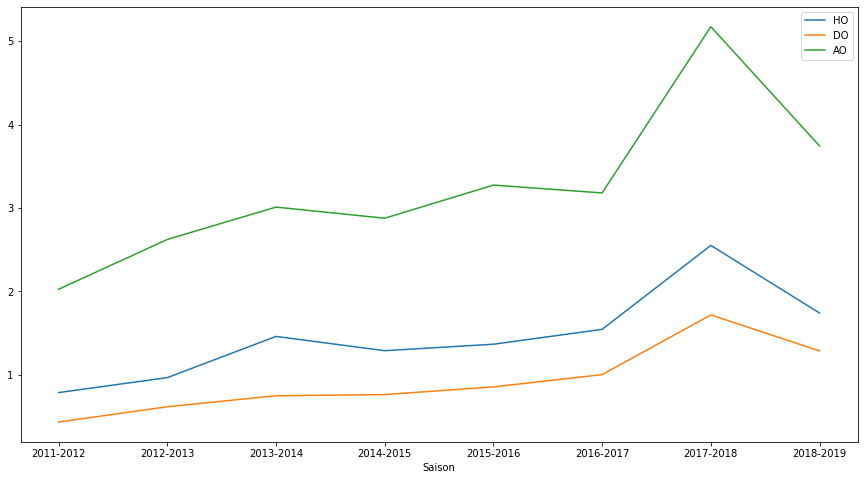

In [22]:
fig, ax = plt.subplots(figsize=(15,8))
df.groupby(['Saison']).std()['HO'].plot(ax=ax)
df.groupby(['Saison']).std()['DO'].plot(ax=ax)
df.groupby(['Saison']).std()['AO'].plot(ax=ax)
plt.legend()

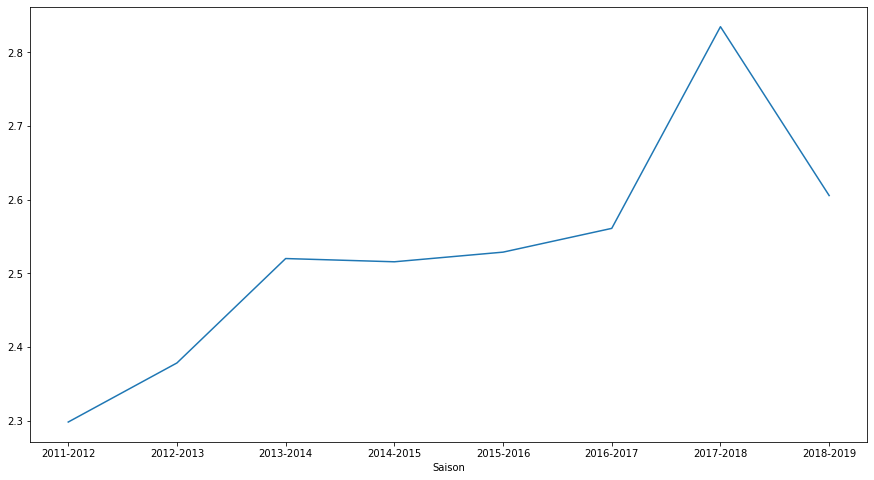

In [23]:
fig, ax = plt.subplots(figsize=(15,8))
df.groupby(['Saison']).mean()['HO'].plot(ax=ax)

In [108]:
label_W = df[['HO','Saison']]
label_D = df['DO']
label_A = df['AO']
data = df.drop(columns=(['HO','DO','AO','AC', 'AF', 'AR', 'AS', 'AST', 'AY','B365A', 'B365D',
       'B365H', 'BSA', 'BSD', 'BSH', 'BWA', 'BWD', 'BWH', 'Bb1X2', 'BbAH',
       'BbAHh', 'BbAv<2.5', 'BbAv>2.5', 'BbAvA', 'BbAvAHA', 'BbAvAHH', 'BbAvD',
       'BbAvH', 'BbMx<2.5', 'BbMx>2.5', 'BbMxA', 'BbMxAHA', 'BbMxAHH', 'BbMxD',
       'BbMxH', 'BbOU', 'Date', 'Div', 'FTAG', 'HomeTeam_Awayteam','Budget','Budget_Awayteam','FTHG', 'FTR', 'GBA', 'GBD',
       'GBH', 'HC', 'HF', 'HR', 'HS', 'HST', 'HTAG', 'HTHG', 'HTR', 'HY','IWA', 'IWD', 'IWH', 'LBA', 'LBD', 'LBH', 'PSA', 'PSCA',
       'PSCD', 'PSCH', 'PSD', 'PSH', 'SBA', 'SBD', 'SBH', 'SJA', 'SJD', 'SJH',
       'VCA', 'VCD', 'VCH', 'WHA', 'WHD', 'WHH','Home_point','Away_point']))
data.info

<bound method DataFrame.info of          HomeTeam               AwayTeam     Saison  Avancement_saison  \
0         Ajaccio               Toulouse  2011-2012                0.0   
1           Brest  Evian Thonon Gaillard  2011-2012                0.0   
2            Caen           Valenciennes  2011-2012                0.0   
3       Marseille                Sochaux  2011-2012                0.0   
4     Montpellier                Auxerre  2011-2012                0.0   
...           ...                    ...        ...                ...   
3035       Nantes             Strasbourg  2018-2019                1.0   
3036         Nice                 Monaco  2018-2019                1.0   
3037        Nimes                   Lyon  2018-2019                1.0   
3038        Reims               Paris SG  2018-2019                1.0   
3039       Rennes                  Lille  2018-2019                1.0   

      Budget_rapport  Affluence  Classt_Home  Classt_Away  Cumul_HC  Cumul_AC  

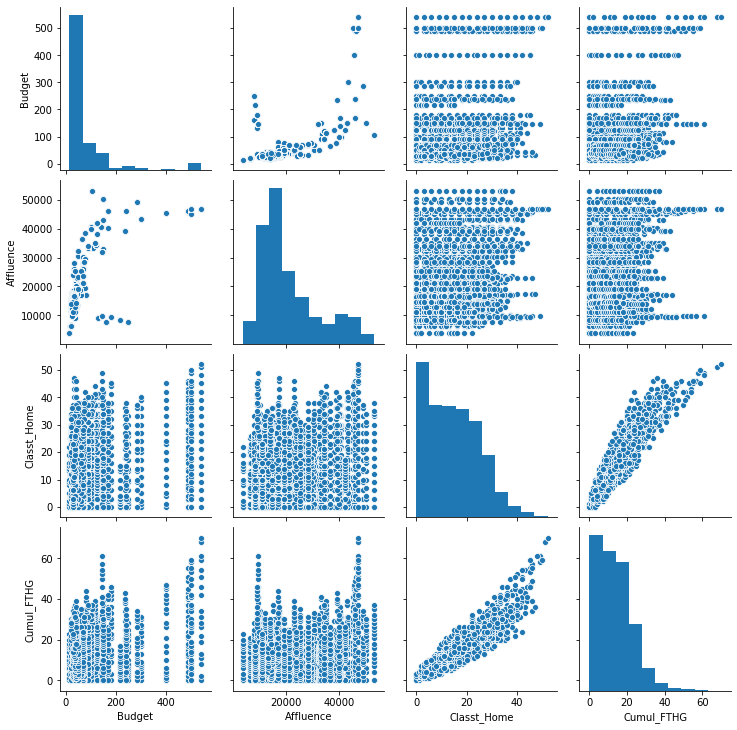

In [25]:
sns.pairplot(data=data,
             x_vars=['Budget','Affluence','Classt_Home','Cumul_FTHG'],
                  y_vars=['Budget','Affluence','Classt_Home','Cumul_FTHG'])

# Modelisation

Encodage

In [25]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3039 entries, 0 to 3039
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HomeTeam           3039 non-null   object 
 1   AwayTeam           3039 non-null   object 
 2   Saison             3039 non-null   object 
 3   Avancement_saison  3039 non-null   float64
 4   Budget_rapport     3039 non-null   float64
 5   Affluence          3039 non-null   int64  
 6   Classt_Home        3039 non-null   float64
 7   Classt_Away        3039 non-null   float64
 8   Cumul_HC           3039 non-null   float64
 9   Cumul_AC           3039 non-null   float64
 10  Cumul_HF           3039 non-null   float64
 11  Cumul_AF           3039 non-null   float64
 12  Cumul_HR           3039 non-null   float64
 13  Cumul_AR           3039 non-null   float64
 14  Cumul_HS           3039 non-null   float64
 15  Cumul_AS           3039 non-null   float64
 16  Cumul_HST          3039 

In [68]:
preprocessor = make_column_transformer(
    (OneHotEncoder(),['HomeTeam','AwayTeam','Saison']),
    (StandardScaler(),['Classt_Home', 'Classt_Away','Cumul_HC', 'Cumul_AC', 'Cumul_HF', 'Cumul_AF', 'Cumul_HR', 'Cumul_AR', 'Cumul_HS',
       'Cumul_AS', 'Cumul_HST', 'Cumul_AST', 'Cumul_HY', 'Cumul_AY',
       'Cumul_FTHG', 'Cumul_FTAG', 'Cumul_HTHG', 'Cumul_HTAG','Budget_rapport','Avancement_saison','Affluence'])
)
preprocessor.fit_transform(data)


<3039x87 sparse matrix of type '<class 'numpy.float64'>'
	with 69897 stored elements in Compressed Sparse Row format>

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [539]:
from sklearn.model_selection import train_test_split
data_train, data_test, label_train, label_test = train_test_split(data, label_A, test_size=.30)


In [74]:
preprocessor = make_column_transformer(
    (StandardScaler(),['Classt_Home', 'Classt_Away','Cumul_HC', 'Cumul_AC', 'Cumul_HF', 'Cumul_AF', 'Cumul_HR', 'Cumul_AR', 'Cumul_HS',
       'Cumul_AS', 'Cumul_HST', 'Cumul_AST', 'Cumul_HY', 'Cumul_AY',
       'Cumul_FTHG', 'Cumul_FTAG', 'Cumul_HTHG', 'Cumul_HTAG','Budget_rapport','Avancement_saison','Affluence'])
)

from sklearn.model_selection import train_test_split
data_train= data[data['Saison'].isin(['2011-2012','2012-2013','2013-2014','2014-2015','2015-2016','2016-2017'])] 
data_train = data_train.drop(columns=(['HomeTeam','AwayTeam','Saison']))
label_train = label_W[label_W['Saison'].isin(['2011-2012','2012-2013','2013-2014','2014-2015','2015-2016','2016-2017'])] 
label_train = label_train['HO']
data_test= data[data['Saison'].isin(['2017-2018','2018-2019'])] 
data_test = data_test.drop(columns=(['HomeTeam','AwayTeam','Saison']))
label_test = label_W[label_W['Saison'].isin(['2017-2018','2018-2019'])]
label_test = label_test['HO']

data_train

,Avancement_saison,Budget_rapport,Affluence,Classt_Home,Classt_Away,Cumul_HC,Cumul_AC,Cumul_HF,Cumul_AF,Cumul_HR,...,Cumul_HS,Cumul_AS,Cumul_HST,Cumul_AST,Cumul_HY,Cumul_AY,Cumul_FTHG,Cumul_FTAG,Cumul_HTHG,Cumul_HTAG
0,0.0,0.400000,6338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.038462,13542,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.066667,15280,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,3.500000,40445,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.825000,17492,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2275,1.0,3.571429,39894,40.0,31.0,90.0,79.0,236.0,226.0,0.0,...,247.0,179.0,86.0,48.0,28.0,35.0,32.0,12.0,13.0,4.0
2276,1.0,0.428571,17516,21.0,40.0,87.0,72.0,227.0,244.0,0.0,...,221.0,173.0,58.0,61.0,35.0,30.0,18.0,16.0,8.0,3.0
2277,1.0,17.241379,45160,44.0,10.0,154.0,62.0,184.0,202.0,0.0,...,310.0,196.0,111.0,57.0,19.0,26.0,41.0,14.0,15.0,5.0
2278,1.0,0.344828,22688,36.0,10.0,73.0,99.0,216.0,233.0,1.0,...,201.0,229.0,67.0,105.0,29.0,22.0,24.0,41.0,10.0,22.0


In [75]:
lr = LinearRegression()
lr.fit(preprocessor.fit_transform(data_train), label_train)
lr.score(preprocessor.fit_transform(data_test), label_test)


0.2882109078096817

In [76]:
lr.score(preprocessor.fit_transform(data_test), label_test)

0.2882109078096817

In [77]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(lr.predict(preprocessor.fit_transform(data_test)),label_test)

0.7815492266996198

In [244]:
from sklearn.metrics import mean_squared_error
mean_squared_error(lr.predict(preprocessor.fit_transform(data_test)),label_test)

2.3294839797825535

# Random Forest

In [78]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(preprocessor.fit_transform(data_train), label_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [79]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(rfr.predict(preprocessor.fit_transform(data_test)),label_test)

0.5606805641835243

In [80]:
from sklearn.metrics import mean_squared_error
mean_squared_error(rfr.predict(preprocessor.fit_transform(data_test)),label_test)

1.923291365191204

# Gradient boosting

#### Test WIN

In [81]:
import xgboost as xgb

In [603]:
from sklearn.model_selection import train_test_split
data_train, data_test, label_train, label_test = train_test_split(data, label_W, test_size=.40)

In [82]:
xgbr = xgb.XGBRegressor() 
xgbr.fit(preprocessor.fit_transform(data_train), label_train)

[17:05:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [83]:
scores = cross_val_score(xgbr, preprocessor.fit_transform(data_train), label_train,cv=5, scoring='neg_mean_absolute_error')
print("Mean cross-validation score: %.2f" % scores.mean())
scores

[17:05:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:05:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:05:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:05:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:05:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean cross-validation score: -0.35


array([-0.3071622 , -0.34738631, -0.38209496, -0.37684149, -0.35624212])

In [84]:
from sklearn.model_selection import learning_curve
import numpy as np

In [85]:
sample_sizes, train_scores, test_scores = learning_curve(
    xgbr, preprocessor.fit_transform(data), label_W,
    train_sizes=np.array([0.1  , 0.2, 0.25 , 0.30 ,0.35 ,0.40 ,0.45 ,0.50 ,0.55 , 0.775, 1]), scoring='neg_mean_absolute_error', cv=5,
    shuffle=True
)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: DataFrame for label cannot have multiple columns

  FitFailedWarning)


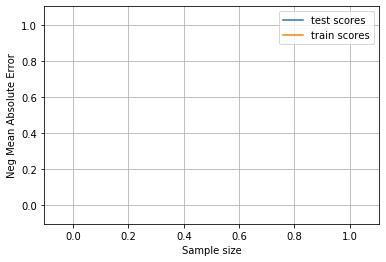

In [86]:
plt.plot(sample_sizes, test_scores.mean(axis=1), label='test scores')
plt.plot(sample_sizes, train_scores.mean(axis=1), label='train scores')
plt.xlabel('Sample size')
plt.ylabel('Neg Mean Absolute Error')
plt.legend()
plt.grid()

In [87]:
xgbr.score(preprocessor.fit_transform(data_test), label_test)

0.5857532964018534

In [88]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(xgbr.predict(preprocessor.fit_transform(data_test)),label_test)

0.5601824252635913

In [89]:
from sklearn.metrics import mean_squared_error
mean_squared_error(xgbr.predict(preprocessor.fit_transform(data_test)),label_test)

1.9773855187846745

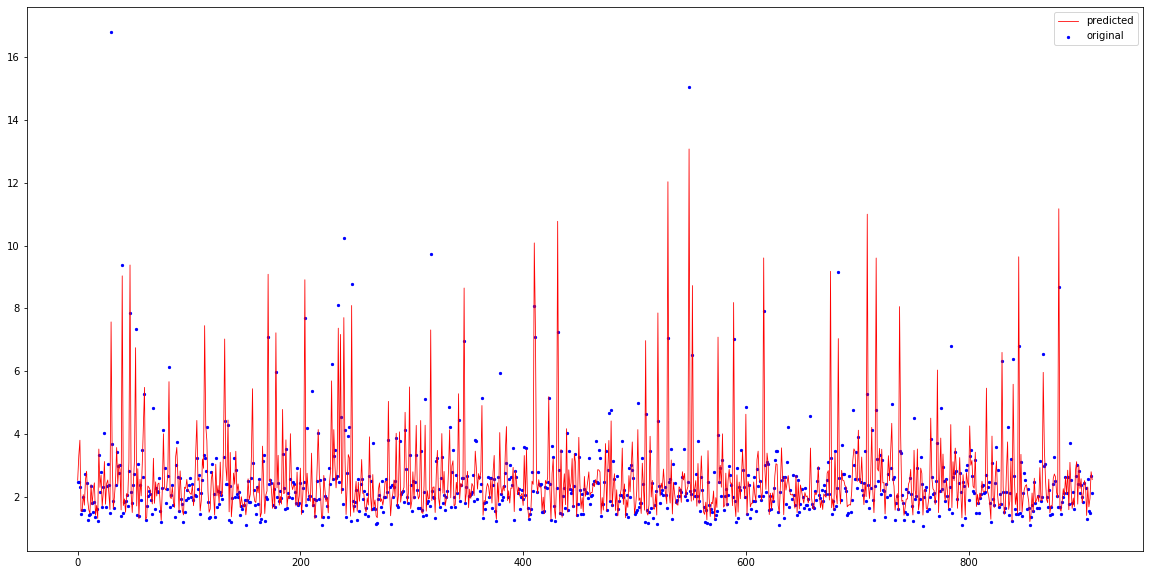

In [154]:
x_ax = range(len(label_test))
fig = plt.figure(1, figsize=(20, 10))
plt.scatter(x_ax, label_test, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

#### Test Draw

In [591]:
from sklearn.model_selection import train_test_split
data_train, data_test, label_train, label_test = train_test_split(data, label_D, test_size=.30)

In [592]:
import xgboost as xgb

In [593]:
xgbr = xgb.XGBRegressor() 
xgbr.fit(preprocessor.fit_transform(data_train), label_train)

[13:04:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [594]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(xgbr.predict(preprocessor.fit_transform(data_test)),label_test)

0.29516045738677393

In [206]:
from sklearn.metrics import mean_squared_error
mean_squared_error(xgbr.predict(preprocessor.fit_transform(data_test)),label_test)

0.3869427026798046

#### Test Away

In [597]:
from sklearn.model_selection import train_test_split
data_train, data_test, label_train, label_test = train_test_split(data, label_A, test_size=.30)

In [598]:
import xgboost as xgb

In [599]:
import xgboost as xgb
xgbr = xgb.XGBRegressor() 
xgbr.fit(preprocessor.fit_transform(data_train), label_train)

[13:06:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [214]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(xgbr.predict(preprocessor.fit_transform(data_test)),label_test)

0.7638345578371797

In [215]:
from sklearn.metrics import mean_squared_error
mean_squared_error(xgbr.predict(preprocessor.fit_transform(data_test)),label_test)

1.7948950842820144

# Importance des variables

In [605]:
from sklearn.inspection import permutation_importance

result = permutation_importance(xgbr, preprocessor.fit_transform(data_test), label_test, n_repeats=10,
                                random_state=42, n_jobs=2)


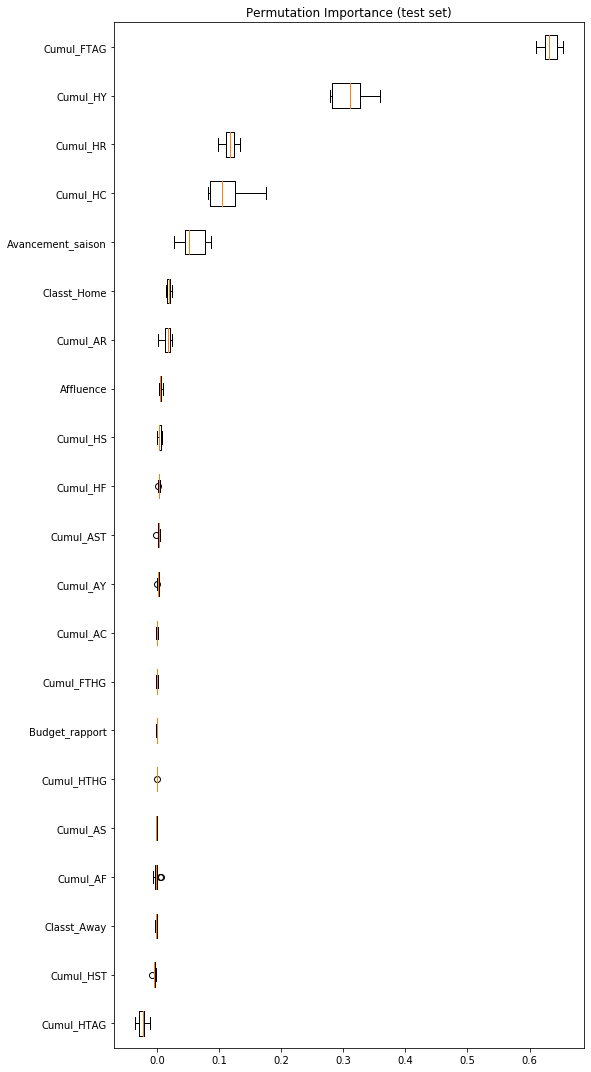

In [606]:
import xgboost as xgb
result = permutation_importance(xgbr, preprocessor.fit_transform(data_test), label_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
fig = plt.figure(1, figsize=(15, 15))
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(xgb.DMatrix(data_test).feature_names)[sorted_idx])
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

# Amelioration XGB

#### Victoire à domicile

In [628]:
from sklearn.model_selection import train_test_split
data_train, data_test, label_train, label_test = train_test_split(data, label_W, test_size=.30)

In [90]:
import xgboost as xgb
params = {'min_child_weight':[3,4,5], 'gamma':[i/10.0 for i in range(3,5)],  'subsample':[i/10.0 for i in range(8,10)],
'colsample_bytree':[i/10.0 for i in range(6,10)], 'max_depth': [2,3,4], 'learning_rate': [0.05, .07, 1]}


# Initialize XGB and GridSearch
xgb = xgb.XGBRegressor() 

grid_win = GridSearchCV(xgb, params, scoring='neg_mean_squared_error', cv=4)
grid_win.fit(preprocessor.fit_transform(data_train), label_train)

[17:07:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:07:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:07:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:07:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:07:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:07:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:07:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:07:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:07:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[17:07:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:07:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:07:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:07:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:07:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:07:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:07:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:07:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:07:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[17:07:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:07:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:07:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:07:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:07:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:07:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:07:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:07:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:07:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[17:08:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:08:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:08:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:08:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:08:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:08:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:08:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:08:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:08:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[17:08:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:08:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:08:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:08:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:08:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:08:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:08:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:08:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:08:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[17:08:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:08:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:08:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:08:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:08:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:08:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:08:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:08:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:08:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[17:08:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:08:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:08:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:08:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:08:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:08:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:08:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:08:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:08:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[17:09:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:09:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:09:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:09:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:09:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:09:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:09:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:09:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:09:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[17:09:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:09:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:09:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:09:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:09:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:09:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:09:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:09:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:09:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[17:09:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:09:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:09:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:09:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:09:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:09:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:09:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:09:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:09:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[17:10:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:10:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:10:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:10:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:10:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:10:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:10:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:10:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:10:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[17:10:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:10:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:10:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:10:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:10:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:10:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:10:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:10:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:10:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[17:10:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:10:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:10:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:10:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:10:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:10:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:10:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:10:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:10:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[17:10:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:10:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:10:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:10:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:11:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:11:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:11:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:11:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:11:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[17:11:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:11:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:11:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:11:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:11:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:11:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:11:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:11:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:11:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[17:11:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:11:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:11:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:11:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:11:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:11:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:11:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:11:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:11:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[17:11:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:11:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:11:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:11:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:11:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:11:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:12:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:12:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:12:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[17:12:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:12:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:12:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:12:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:12:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:12:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:12:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:12:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:12:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[17:12:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:12:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:12:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:12:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:12:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:12:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:12:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:12:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:12:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[17:12:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:12:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:12:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:12:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:12:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:12:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:12:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:12:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:12:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[17:13:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[17:13:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[17:13:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[17:14:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:14:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:14:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:14:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:14:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:14:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:14:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:14:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:14:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[17:14:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:14:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:14:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:14:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:14:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:14:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:14:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:14:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:14:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

GridSearchCV(cv=4, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_...
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
                         'gamma': [0.3, 0.4], 'learning_rate': [0.05, 0

In [91]:
#check des grid paramètres
grid_win.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0.3,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=4, min_child_weight=5, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.8, verbosity=1)

In [92]:
grid_win.best_estimator_.score(preprocessor.fit_transform(data_train), label_train)

0.8981847684715254

In [93]:
grid_win.best_estimator_.score(preprocessor.fit_transform(data_test), label_test)

0.581938484812715

In [94]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(grid_win.predict(preprocessor.fit_transform(data_test)),label_test)

0.5569794206447172

In [95]:
from sklearn.metrics import mean_squared_error
mean_squared_error(grid_win.predict(preprocessor.fit_transform(data_test)),label_test)

1.9955953274029026

In [637]:
from sklearn.model_selection import learning_curve
import numpy as np

In [638]:
sample_sizes, train_scores, test_scores = learning_curve(
    grid_win.best_estimator_, preprocessor.fit_transform(data), label_W,
    train_sizes=np.array([0.1  , 0.2, 0.25 , 0.30 ,0.35 ,0.40 ,0.45 ,0.50 ,0.55 , 0.775, 1]), scoring='neg_mean_absolute_error', cv=10,
    shuffle=True
)


[00:52:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:52:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:52:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:52:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:52:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:52:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:52:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:52:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:52:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

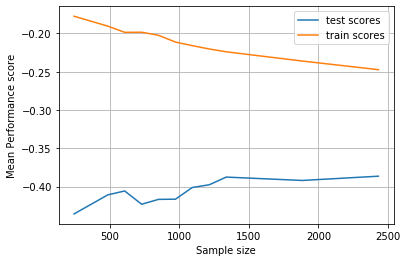

In [280]:
plt.plot(sample_sizes, test_scores.mean(axis=1), label='test scores')
plt.plot(sample_sizes, train_scores.mean(axis=1), label='train scores')
plt.xlabel('Sample size')
plt.ylabel('Mean Performance score')
plt.legend()
plt.grid()

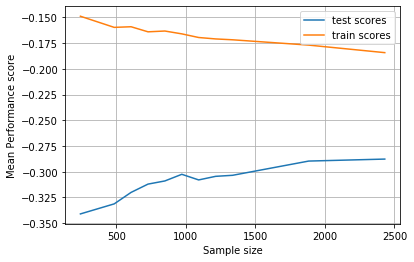

In [278]:
plt.plot(sample_sizes, test_scores.mean(axis=1), label='test scores')
plt.plot(sample_sizes, train_scores.mean(axis=1), label='train scores')
plt.xlabel('Sample size')
plt.ylabel('Mean Performance score')
plt.legend()
plt.grid()

#### Match Nul

In [644]:
from sklearn.model_selection import train_test_split
draw_train, draw_test, labelD_train, labelD_test = train_test_split(data, label_D, test_size=.30)

In [640]:
import xgboost as xgb
params = {'min_child_weight':[3,4,5], 'gamma':[i/10.0 for i in range(3,5)],  'subsample':[i/10.0 for i in range(8,10)],
'colsample_bytree':[i/10.0 for i in range(6,10)], 'max_depth': [2,3,4], 'learning_rate': [0.05, .07, 1]}

# Initialize XGB and GridSearch
xgb = xgb.XGBRegressor(nthread=-1) 

grid_Draw = GridSearchCV(xgb, params, scoring='neg_mean_absolute_error', cv=4)
grid_Draw.fit(preprocessor.fit_transform(draw_train), labelD_train)

[00:52:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:52:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:52:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:52:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:52:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:52:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:52:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:52:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:52:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

GridSearchCV(cv=4, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=-1,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_la...
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
                         'gamma': [0.3, 0.4], 'learning_rate': [0.05, 0

In [645]:
grid_Draw.best_estimator_.score(preprocessor.fit_transform(draw_train), labelD_train)

0.7242928651763698

In [277]:
sample_sizes, train_scores, test_scores = learning_curve(
    grid_Draw.best_estimator_, preprocessor.fit_transform(data), label_D,
    train_sizes=np.array([0.1  , 0.2, 0.25 , 0.30 ,0.35 ,0.40 ,0.45 ,0.50 ,0.55 , 0.775, 1]), scoring='neg_mean_absolute_error', cv=5,
    shuffle=True
)


[00:10:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:10:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:10:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:10:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:10:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:10:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:10:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:10:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:10:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

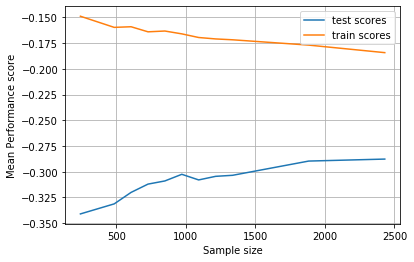

In [278]:
plt.plot(sample_sizes, test_scores.mean(axis=1), label='test scores')
plt.plot(sample_sizes, train_scores.mean(axis=1), label='train scores')
plt.xlabel('Sample size')
plt.ylabel('Mean Performance score')
plt.legend()
plt.grid()

In [646]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(grid_Draw.predict(preprocessor.fit_transform(draw_test)),labelD_test)

0.3360135036615368

In [647]:
from sklearn.metrics import mean_squared_error
mean_squared_error(grid_Draw.predict(preprocessor.fit_transform(draw_test)),labelD_test)

0.36191866153288593

In [ ]:
plt.plot(sample_sizes, test_scores.mean(axis=1), label='test scores')
plt.plot(sample_sizes, train_scores.mean(axis=1), label='train scores')
plt.xlabel('Sample size')
plt.ylabel('Mean Performance score')
plt.legend()
plt.grid()

#### Victoire à l'exterieur

In [641]:
from sklearn.model_selection import train_test_split
Away_train, Away_test, labelA_train, labelA_test = train_test_split(data, label_A, test_size=.30)

In [642]:
import xgboost as xgb
params = {'min_child_weight':[3,4,5], 'gamma':[i/10.0 for i in range(3,5)],  'subsample':[i/10.0 for i in range(8,10)],
'colsample_bytree':[i/10.0 for i in range(6,10)], 'max_depth': [2,3,4], 'learning_rate': [0.05, .07, 1]}

# Initialize XGB and GridSearch
xgb = xgb.XGBRegressor(nthread=-1) 

grid_Away = GridSearchCV(xgb, params, scoring='neg_mean_absolute_error',cv=4)
grid_Away.fit(preprocessor.fit_transform(Away_train), labelA_train)

[00:59:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:59:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:59:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:59:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:59:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:59:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:59:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:59:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:59:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

GridSearchCV(cv=4, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=-1,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_la...
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
                         'gamma': [0.3, 0.4], 'learning_rate': [0.05, 0

In [500]:
sample_sizes, train_scores, test_scores = learning_curve(
    grid_Away.best_estimator_, preprocessor.fit_transform(data), label_A,
    train_sizes=np.array([0.1  , 0.2, 0.25 , 0.30 ,0.35 ,0.40 ,0.45 ,0.50 ,0.55 , 0.775, 1]), scoring='neg_mean_absolute_error', cv=5,
    shuffle=True
)


[14:50:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:50:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:50:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:50:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:50:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:50:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:50:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:50:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:50:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

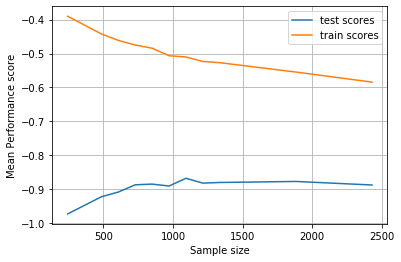

In [501]:
plt.plot(sample_sizes, test_scores.mean(axis=1), label='test scores')
plt.plot(sample_sizes, train_scores.mean(axis=1), label='train scores')
plt.xlabel('Sample size')
plt.ylabel('Mean Performance score')
plt.legend()
plt.grid()

In [246]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(grid_Away.predict(preprocessor.fit_transform(Away_test)),labelA_test)

0.6994814349910538

In [247]:
from sklearn.metrics import mean_squared_error
mean_squared_error(grid_Away.predict(preprocessor.fit_transform(Away_test)),labelA_test)

1.5089869007767178

# Metrique de rendement

#### Victoire à domicile

In [96]:
best_grid_win = grid_win.best_estimator_

In [97]:
# Base avec cote predites et cote réelle

x = label_test.to_frame()
df2 = x.merge(df[['FTR','B365H', 'BSH', 'BWH', 'GBH', 'IWH', 'LBH', 'PSH', 'SBH', 'SJH', 'VCH', 'WHH']], left_index=True, right_index=True)
df2

y_pred = pd.DataFrame(best_grid_win.predict(preprocessor.fit_transform(data_test)),columns={'Pred'})
y_pred.index = df2.index

df_out = pd.merge(df2,y_pred,how = 'left',left_index = True, right_index = True)
df_out


,HO,FTR,B365H,BSH,BWH,GBH,IWH,LBH,PSH,SBH,SJH,VCH,WHH,Pred
2280,1.307143,H,1.30,NaN,1.30,NaN,1.35,1.28,1.32,NaN,NaN,1.30,1.30,1.800960
2281,1.377143,H,1.36,NaN,1.36,NaN,1.40,1.36,1.40,NaN,NaN,1.36,1.40,1.586550
2282,2.790000,A,2.80,NaN,2.80,NaN,2.65,2.75,2.95,NaN,NaN,2.88,2.70,2.307717
2283,1.875714,H,1.91,NaN,1.83,NaN,1.85,1.85,1.88,NaN,NaN,1.90,1.91,2.307717
2284,1.122857,H,1.11,NaN,1.12,NaN,1.17,1.11,1.13,NaN,NaN,1.12,1.10,1.558601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3035,1.675000,A,1.65,NaN,1.67,NaN,1.70,NaN,1.71,NaN,NaN,1.67,1.65,2.019278
3036,3.235000,H,3.10,NaN,3.25,NaN,3.25,NaN,3.31,NaN,NaN,3.30,3.20,3.382701
3037,3.225000,A,3.40,NaN,3.20,NaN,3.10,NaN,3.25,NaN,NaN,3.20,3.20,5.175317
3038,5.993333,H,6.50,NaN,6.50,NaN,5.60,NaN,5.81,NaN,NaN,5.75,5.80,6.698367


In [105]:
df_out['HF'] = df[['B365H', 'BSH', 'BWH', 'GBH', 'IWH', 'LBH', 'PSH', 'SBH', 'SJH', 'VCH', 'WHH']].max(axis=1)
df_out['test'] = df_out['Pred']/df_out['HF']
mise = 1
df_out['Parié']= df_out['test'] <= 0.60
df_out['gagné'] = (df_out['Parié'] == True) & (df_out['FTR'] == 'H')
df_out['gain'] = df_out.apply( lambda x: mise * x['HF'] if x['gagné'] == True else 0, axis =1)
df_out['perdu'] = (df_out['Parié'] == True) & (df_out['FTR'] != 'H')
df_out['perte'] = df_out.apply(lambda x: mise if x['perdu'] == True else 0, axis =1)
df_out['gain_cumul'] = df_out['gain'].sum()
df_out['Parié_cumul'] = df_out['Parié'].sum()
df_out['rdt'] = (df_out['gain'].sum() - df_out['Parié'].sum()) / df_out['Parié'].sum()
df_out




,HO,FTR,B365H,BSH,BWH,GBH,IWH,LBH,PSH,SBH,...,HF,test,Parié,gagné,gain,perdu,perte,gain_cumul,Parié_cumul,rdt
2280,1.307143,H,1.30,NaN,1.30,NaN,1.35,1.28,1.32,NaN,...,1.35,1.334044,False,False,0.0,False,0,30.75,27,0.138889
2281,1.377143,H,1.36,NaN,1.36,NaN,1.40,1.36,1.40,NaN,...,1.40,1.133250,False,False,0.0,False,0,30.75,27,0.138889
2282,2.790000,A,2.80,NaN,2.80,NaN,2.65,2.75,2.95,NaN,...,2.95,0.782277,False,False,0.0,False,0,30.75,27,0.138889
2283,1.875714,H,1.91,NaN,1.83,NaN,1.85,1.85,1.88,NaN,...,1.91,1.208229,False,False,0.0,False,0,30.75,27,0.138889
2284,1.122857,H,1.11,NaN,1.12,NaN,1.17,1.11,1.13,NaN,...,1.17,1.332138,False,False,0.0,False,0,30.75,27,0.138889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3035,1.675000,A,1.65,NaN,1.67,NaN,1.70,NaN,1.71,NaN,...,1.71,1.180864,False,False,0.0,False,0,30.75,27,0.138889
3036,3.235000,H,3.10,NaN,3.25,NaN,3.25,NaN,3.31,NaN,...,3.31,1.021964,False,False,0.0,False,0,30.75,27,0.138889
3037,3.225000,A,3.40,NaN,3.20,NaN,3.10,NaN,3.25,NaN,...,3.40,1.522152,False,False,0.0,False,0,30.75,27,0.138889
3038,5.993333,H,6.50,NaN,6.50,NaN,5.60,NaN,5.81,NaN,...,6.50,1.030518,False,False,0.0,False,0,30.75,27,0.138889


#### Match nul

In [493]:
best_grid_draw = grid_Draw.best_estimator_

In [494]:
# Base avec cote predites et cote réelle

x = labelD_test.to_frame()
df2 = x.merge(df[['FTR','B365D', 'BSD', 'BWD', 'GBD', 'IWD', 'LBD', 'PSD', 'SBD', 'SJD', 'VCD', 'WHD']], left_index=True, right_index=True)
df2

y_pred = pd.DataFrame(best_grid_draw.predict(preprocessor.fit_transform(draw_test)),columns={'Pred'})
y_pred.index = df2.index

df_out = pd.merge(df2,y_pred,how = 'left',left_index = True, right_index = True)
df_out


,DO,FTR,B365D,BSD,BWD,GBD,IWD,LBD,PSD,SBD,SJD,VCD,WHD,Pred
2162,3.064286,A,3.10,NaN,3.00,NaN,3.10,3.00,3.15,NaN,NaN,3.10,3.00,3.273310
683,3.176000,H,3.20,3.20,3.00,3.0,3.20,3.20,3.36,NaN,3.2,3.30,3.10,3.745277
101,3.090000,A,3.10,3.20,3.00,3.1,3.05,3.00,NaN,3.05,3.1,3.20,3.10,3.139108
2602,6.245714,H,6.50,NaN,6.75,NaN,5.50,6.00,6.47,NaN,NaN,6.50,6.00,7.098182
207,3.067000,D,3.00,3.10,3.10,3.0,3.05,3.00,NaN,3.10,3.1,3.12,3.10,3.188094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,3.573333,H,3.50,NaN,3.50,NaN,3.60,NaN,3.64,NaN,NaN,3.60,3.60,3.685090
268,3.895000,H,4.20,3.80,3.90,4.0,3.80,3.75,NaN,3.75,3.8,4.20,3.75,3.224125
1486,3.241429,D,3.30,NaN,3.10,NaN,3.00,3.25,3.44,NaN,NaN,3.40,3.20,3.404762
473,3.764000,A,3.75,3.75,3.50,3.5,3.80,3.75,4.14,NaN,3.6,4.10,3.75,5.090461


In [497]:
df_out['HF'] = df[['B365D', 'BSD', 'BWD', 'GBD', 'IWD', 'LBD', 'PSD', 'SBD', 'SJD', 'VCD', 'WHD']].max(axis=1)
df_out['test'] = df_out['Pred']/df_out['HF']
mise = 1
df_out['Parié']= df_out['test'] <= 0.85
df_out['gagné'] = (df_out['Parié'] == True) & (df_out['FTR'] == 'D')
df_out['gain'] = df_out.apply( lambda x: mise * x['HF'] if x['gagné'] == True else 0, axis =1)
df_out['perdu'] = (df_out['Parié'] == True) & (df_out['FTR'] != 'D')
df_out['perte'] = df_out.apply(lambda x: mise if x['perdu'] == True else 0, axis =1)
df_out['gain_cumul'] = df_out['gain'].sum()
df_out['Parié_cumul'] = df_out['Parié'].sum()
df_out['rdt'] = (df_out['gain'].sum() - df_out['Parié'].sum()) / df_out['Parié'].sum()
df_out[df_out['Parié'] == True]


,DO,FTR,B365D,BSD,BWD,GBD,IWD,LBD,PSD,SBD,...,HF,test,Parié,gagné,gain,perdu,perte,gain_cumul,Parié_cumul,rdt
2488,12.057143,H,13.00,NaN,12.00,NaN,8.00,12.00,14.40,NaN,...,14.40,0.814228,True,False,0.00,True,1,48.83,46,0.061522
963,3.841250,H,3.75,NaN,3.90,NaN,3.90,4.00,4.03,NaN,...,4.03,0.847757,True,False,0.00,True,1,48.83,46,0.061522
927,6.862500,H,7.00,NaN,7.25,NaN,5.80,6.50,8.10,NaN,...,8.10,0.547625,True,False,0.00,True,1,48.83,46,0.061522
2965,9.758333,D,11.00,NaN,9.50,NaN,9.00,NaN,9.55,NaN,...,11.00,0.847722,True,True,11.00,False,0,48.83,46,0.061522
1882,4.291429,D,4.33,NaN,4.00,NaN,4.30,4.20,4.41,NaN,...,4.41,0.847699,True,True,4.41,False,0,48.83,46,0.061522
1867,4.131429,H,4.33,NaN,3.80,NaN,3.90,4.00,4.39,NaN,...,4.50,0.817949,True,False,0.00,True,1,48.83,46,0.061522
1888,6.484286,H,6.50,NaN,6.50,NaN,5.80,6.50,7.09,NaN,...,7.09,0.596677,True,False,0.00,True,1,48.83,46,0.061522
2210,4.265714,H,4.20,NaN,4.10,NaN,3.90,4.33,4.67,NaN,...,4.67,0.816784,True,False,0.00,True,1,48.83,46,0.061522
2230,4.725714,H,5.25,NaN,4.50,NaN,4.30,4.50,4.83,NaN,...,5.25,0.683258,True,False,0.00,True,1,48.83,46,0.061522
2825,4.725000,H,4.75,NaN,4.60,NaN,4.30,NaN,5.10,NaN,...,5.10,0.785488,True,False,0.00,True,1,48.83,46,0.061522


#### Victoire à l'exterieur

In [502]:
best_grid_away = grid_Away.best_estimator_

In [503]:
# Base avec cote predites et cote réelle

x = label_test.to_frame()
df2 = x.merge(df[['FTR','B365A', 'BSA', 'BWA', 'GBA', 'IWA', 'LBA', 'PSA', 'SBA', 'SJA', 'VCA', 'WHA']], left_index=True, right_index=True)
df2

y_pred = pd.DataFrame(best_grid_away.predict(preprocessor.fit_transform(Away_test)),columns={'Pred'})
y_pred.index = df2.index

df_out = pd.merge(df2,y_pred,how = 'left',left_index = True, right_index = True)
df_out


,HO,FTR,B365A,BSA,BWA,GBA,IWA,LBA,PSA,SBA,SJA,VCA,WHA,Pred
14,1.991000,H,4.00,3.75,3.90,3.75,3.70,3.60,NaN,3.6,3.60,4.33,4.00,3.243657
335,1.506000,H,7.00,6.50,6.25,6.75,5.70,6.00,NaN,6.5,7.00,8.50,6.50,4.545755
1969,2.361429,H,3.50,NaN,3.30,NaN,3.30,3.25,3.32,NaN,NaN,3.40,3.20,8.651543
2479,2.200000,H,4.00,NaN,3.50,NaN,3.30,3.50,3.76,NaN,NaN,3.70,3.30,3.014985
145,1.505000,H,7.00,7.50,6.50,7.00,5.40,6.00,NaN,7.5,7.50,8.50,7.00,10.830779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,2.625000,A,2.80,NaN,2.85,NaN,2.90,2.90,2.79,NaN,2.75,2.75,2.75,5.715473
2767,2.303333,A,3.25,NaN,3.30,NaN,3.25,NaN,3.35,NaN,NaN,3.40,3.20,2.612937
451,1.742000,H,5.00,4.75,4.75,4.75,4.65,5.00,5.48,NaN,5.00,5.40,5.00,3.313648
2386,3.271429,A,2.25,NaN,2.20,NaN,2.20,2.20,2.22,NaN,NaN,2.25,2.25,8.860885


In [515]:
df_out['HF'] = df[['FTR','B365A', 'BSA', 'BWA', 'GBA', 'IWA', 'LBA', 'PSA', 'SBA', 'SJA', 'VCA', 'WHA']].max(axis=1)
df_out['test'] = df_out['Pred']/df_out['HF']
mise = 1
df_out['Parié']= df_out['test'] <= 0.6
df_out['gagné'] = (df_out['Parié'] == True) & (df_out['FTR'] == 'A')
df_out['gain'] = df_out.apply( lambda x: mise * x['HF'] if x['gagné'] == True else 0, axis =1)
df_out['perdu'] = (df_out['Parié'] == True) & (df_out['FTR'] != 'A')
df_out['perte'] = df_out.apply(lambda x: mise if x['perdu'] == True else 0, axis =1)
df_out['gain_cumul'] = df_out['gain'].sum()
df_out['Parié_cumul'] = df_out['Parié'].sum()
df_out['rdt'] = (df_out['gain'].sum() - df_out['Parié'].sum()) / df_out['Parié'].sum()
df_out

,HO,FTR,B365A,BSA,BWA,GBA,IWA,LBA,PSA,SBA,...,HF,test,Parié,gagné,gain,perdu,perte,gain_cumul,Parié_cumul,rdt
14,1.991000,H,4.00,3.75,3.90,3.75,3.70,3.60,NaN,3.6,...,4.33,0.749112,False,False,0.0,False,0,192.81,211,-0.086209
335,1.506000,H,7.00,6.50,6.25,6.75,5.70,6.00,NaN,6.5,...,8.50,0.534795,True,False,0.0,True,1,192.81,211,-0.086209
1969,2.361429,H,3.50,NaN,3.30,NaN,3.30,3.25,3.32,NaN,...,3.50,2.471869,False,False,0.0,False,0,192.81,211,-0.086209
2479,2.200000,H,4.00,NaN,3.50,NaN,3.30,3.50,3.76,NaN,...,4.00,0.753746,False,False,0.0,False,0,192.81,211,-0.086209
145,1.505000,H,7.00,7.50,6.50,7.00,5.40,6.00,NaN,7.5,...,8.50,1.274209,False,False,0.0,False,0,192.81,211,-0.086209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,2.625000,A,2.80,NaN,2.85,NaN,2.90,2.90,2.79,NaN,...,2.90,1.970853,False,False,0.0,False,0,192.81,211,-0.086209
2767,2.303333,A,3.25,NaN,3.30,NaN,3.25,NaN,3.35,NaN,...,3.40,0.768511,False,False,0.0,False,0,192.81,211,-0.086209
451,1.742000,H,5.00,4.75,4.75,4.75,4.65,5.00,5.48,NaN,...,5.48,0.604680,False,False,0.0,False,0,192.81,211,-0.086209
2386,3.271429,A,2.25,NaN,2.20,NaN,2.20,2.20,2.22,NaN,...,2.25,3.938171,False,False,0.0,False,0,192.81,211,-0.086209
